In [40]:
from prophet import Prophet

In [41]:
%store -r proxy_prices

In [42]:
#renaming the columns to pass into the forecasting model
proxy_prices = proxy_prices.rename(columns={"DATE":"ds"})
proxy_prices = proxy_prices.rename(columns={"PRICE":"y"})
proxy_prices.head(5)

,ds,y
0,2000-01-01,100.552
1,2000-02-01,101.339
2,2000-03-01,102.127
3,2000-04-01,102.922
4,2000-05-01,103.677


In [43]:
model = Prophet()
model.fit(proxy_prices)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future = model.make_future_dataframe(periods=365)
future.tail(5)

,ds
613,2021-12-28
614,2021-12-29
615,2021-12-30
616,2021-12-31
617,2022-01-01


In [45]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
613,2021-12-28,235.093692,231.717475,238.316904
614,2021-12-29,235.835774,232.667421,239.136621
615,2021-12-30,236.690924,233.241346,240.113101
616,2021-12-31,237.647468,234.387507,240.948356
617,2022-01-01,238.690984,235.186547,241.842860


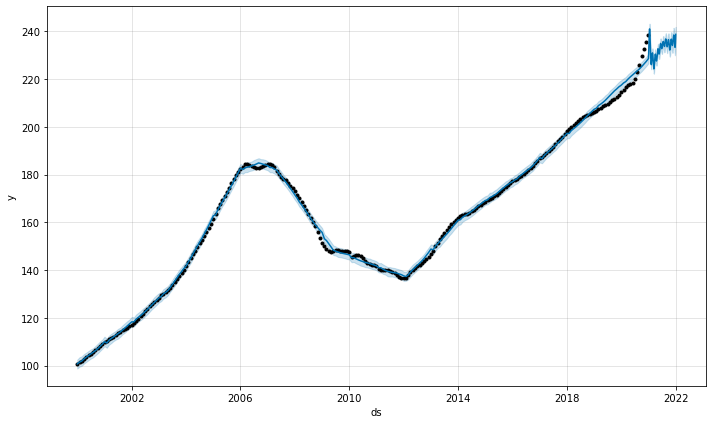

In [46]:
graph = model.plot(forecast)

#### Interactive graph 

In [47]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

#### Automatic Trend Detection

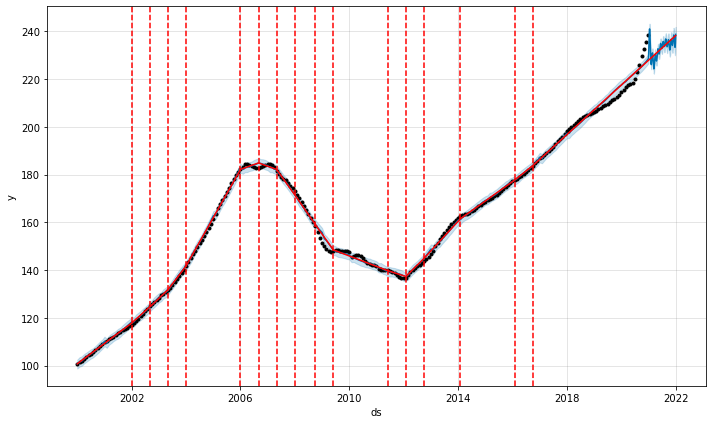

In [48]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)